In [203]:
import pandas as pd
import numpy as np
data=pd.read_csv("Loan.csv")
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [204]:
df_loan=pd.DataFrame(data)
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [205]:
df_loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [206]:
from sklearn.impute import SimpleImputer

In [207]:
columns=["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

In [208]:
df_loan["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [209]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [210]:
# Removing of null value from the data usling simple imputer
for column in columns:
    df_loan[column]=imp.fit_transform(df_loan[column].values.reshape(-1,1))

In [211]:
df_loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [212]:
df_loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [213]:
# Removing of skewness from the data
column=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
for col in column:
    if df_loan.skew().loc[col]>0.55:
       df_loan[col]=np.log1p(df_loan[col])

In [214]:
df_loan.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.137460
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [215]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [216]:
for col in column:
   df_loan[col]=sc.fit_transform(df_loan[col].values.reshape(-1,1))

In [217]:
male=len(df_loan[df_loan["Gender"]== "Male"])
female=len(df_loan[df_loan["Gender"]== "Female"])
print("the no of male are", male)
print("the no of femae are",female)


the no of male are 502
the no of femae are 112


In [218]:
df_loan.describe()

# from below table it is oberve that outlier may be presnet in independent variable applicant income and co applicant income.
# difference between mean and 50 percent also shows the skewness in the data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,9.350555e-16,1.374217e-17,-1.470932e-15,1.795524e-16,8.317632e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-5.157770e+00,-1.107783e+00,-5.220737e+00,-5.132498e+00,-2.428760e+00
25%,-5.841435e-01,-1.107783e+00,-5.018784e-01,2.732313e-01,4.117327e-01
50%,-1.477208e-01,7.206820e-01,-5.608695e-02,2.732313e-01,4.117327e-01
75%,5.017959e-01,8.907879e-01,5.028287e-01,2.732313e-01,4.117327e-01
max,4.593738e+00,1.638995e+00,3.442243e+00,2.137276e+00,4.117327e-01


In [219]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
# Check for the outliers
features=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
for col in features:
    z=np.abs(zscore(df_loan[col]))
    



In [220]:
# No Outlier found
print(np.where(z>3))

(array([ 14,  94, 130, 133, 155, 171, 369, 555, 561, 568], dtype=int64),)


# Data Visualization

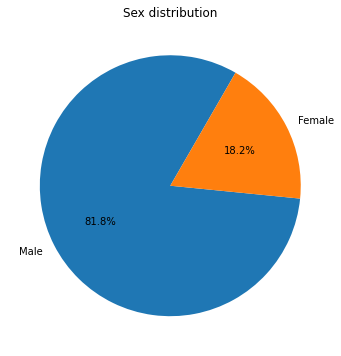

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
categories=[male, female]
labels = ['Male', 'Female']
plt.pie(categories, labels=labels, autopct="%1.1f%%", startangle=60)
plt.title('Sex distribution')
plt.show()

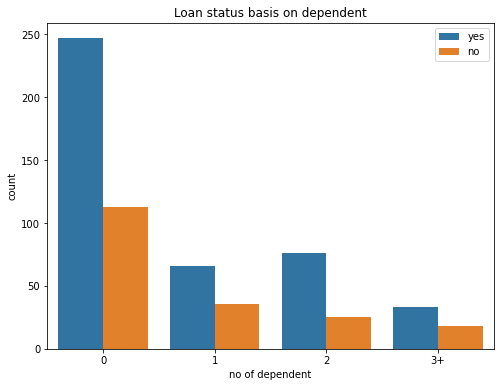

In [222]:
plt.figure(figsize=(8,6))
sns.countplot(x="Dependents",hue="Loan_Status",data=df_loan)
plt.xlabel("no of dependent")
plt.legend(["yes","no"])
plt.title("Loan status basis on dependent")
plt.show()

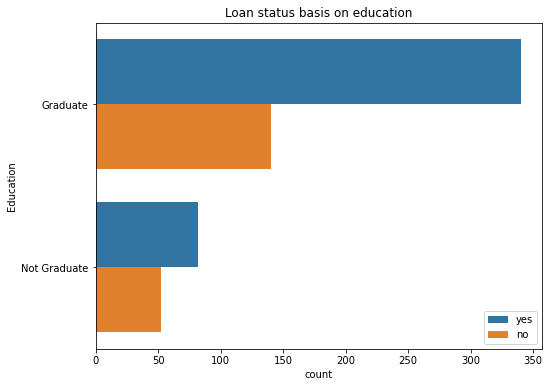

In [223]:
plt.figure(figsize=(8,6))
sns.countplot(y="Education",hue="Loan_Status",data=df_loan)
plt.ylabel("Education")
plt.legend(["yes","no"])
plt.title("Loan status basis on education")
plt.show()

In [224]:
less_income=len(df_loan[df_loan["ApplicantIncome"]<= 5000])
more_income=len(df_loan[df_loan["ApplicantIncome"]> 5000])
print("the no of person having less salary", less_income)
print("the no of person having more salary",more_income)

the no of person having less salary 614
the no of person having more salary 0


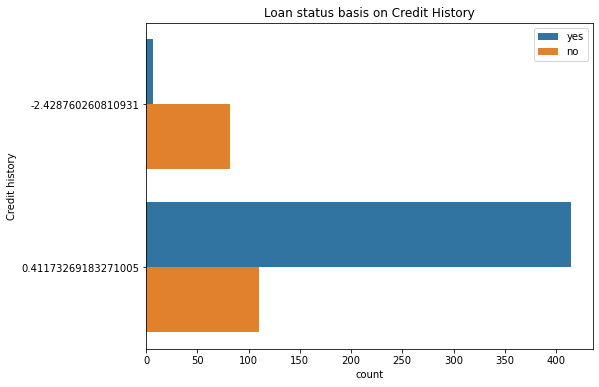

In [225]:
plt.figure(figsize=(8,6))
sns.countplot(y="Credit_History",hue="Loan_Status",data=df_loan)
plt.ylabel("Credit history")
plt.legend(["yes","no"])
plt.title("Loan status basis on Credit History")
plt.show()
# Person with a credit history are likely have less chance to get loan

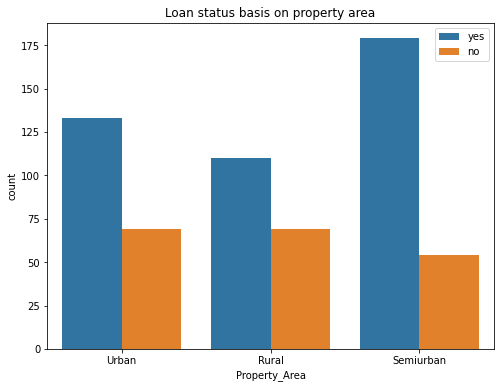

In [226]:
plt.figure(figsize=(8,6))
sns.countplot(x="Property_Area",hue="Loan_Status",data=df_loan)
plt.xlabel("Property_Area")
plt.legend(["yes","no"])
plt.title("Loan status basis on property area")
plt.show()

# Person having property in urban and rural are having moderate chance to not to pay loan.

In [227]:
# converting data categorical to numerical
le=LabelEncoder()
features=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
for col in features:
    data=df_loan[col] = data=df_loan[col].astype("category").cat.codes

In [228]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.516186,-1.107783,-0.138624,0.273231,0.411733,2,1
1,LP001003,1,1,1,0,0,0.137806,0.782158,-0.008123,0.273231,0.411733,0,0
2,LP001005,1,1,0,0,1,-0.519479,-1.107783,-1.343509,0.273231,0.411733,2,1
3,LP001006,1,1,0,1,0,-0.751605,0.897526,-0.138624,0.273231,0.411733,2,1
4,LP001008,1,0,0,0,0,0.555727,-1.107783,0.187592,0.273231,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.572062,-1.107783,-1.196800,0.273231,0.411733,0,1
610,LP002979,1,1,3,0,0,-0.032679,-1.107783,-2.344602,-2.522836,0.411733,0,1
611,LP002983,1,1,1,0,0,1.015921,0.308483,1.372928,0.273231,0.411733,2,1
612,LP002984,1,1,2,0,0,0.918972,-1.107783,0.759593,0.273231,0.411733,2,1


In [229]:
df_loan1=df_loan.drop("Loan_ID",axis=1)


In [236]:
df_loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.516186,-1.107783,-0.138624,0.273231,0.411733,2,1
1,1,1,1,0,0,0.137806,0.782158,-0.008123,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.519479,-1.107783,-1.343509,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.751605,0.897526,-0.138624,0.273231,0.411733,2,1
4,1,0,0,0,0,0.555727,-1.107783,0.187592,0.273231,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.572062,-1.107783,-1.196800,0.273231,0.411733,0,1
610,1,1,3,0,0,-0.032679,-1.107783,-2.344602,-2.522836,0.411733,0,1
611,1,1,1,0,0,1.015921,0.308483,1.372928,0.273231,0.411733,2,1
612,1,1,2,0,0,0.918972,-1.107783,0.759593,0.273231,0.411733,2,1


In [237]:
array = df_loan1.values
x = array[:, 0:11]
y = array[:, 11]

In [238]:
x.shape

(614, 11)

In [239]:
y.shape

(614,)

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [234]:
lregr=LogisticRegression()
def maxraccuracy_score(regr,x,y):
    maxraccuracy_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        Class_rprt=classification_report(y_test,y_pred)
        conf_rprt=confusion_matrix(y_test,y_pred)
        print("classification report is",Class_rprt)
        print("confusion matrix is",conf_rprt)
        print("accuracy score correspond to random state",r_state,"is:", acc_scr)
        if acc_scr>maxraccuracy_score:
            maxraccuracy_score=acc_scr
            final_r_state=r_state
            
    print("max Accuracyscore corresponsds to ",final_r_state,"is:",maxraccuracy_score)
    return final_r_state

In [240]:
maxraccuracy_score(lregr,x,y)

classification report is               precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

confusion matrix is [[18 25]
 [ 1 79]]
accuracy score correspond to random state 42 is: 0.7886178861788617
classification report is               precision    recall  f1-score   support

         0.0       0.89      0.42      0.57        38
         1.0       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123

confusion matrix is [[16 22]
 [ 2 83]]
accuracy score correspond to random state 43 is: 0.8048780487804879
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       1.00      0.45      0.62        42
         1.0       0.78      1.00      0.88        81

    accuracy                           0.81       123
   macro avg       0.89      0.73      0.75       123
weighted avg       0.85      0.81      0.79       123

confusion matrix is [[19 23]
 [ 0 81]]
accuracy score correspond to random state 62 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

         0.0       1.00      0.57      0.73        35
         1.0       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123

confusion matrix is [[20 15]
 [ 0 88]]
accuracy score correspond to random state 63 is: 0.8780487804878049
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.85      0.41      0.56        41
         1.0       0.77      0.96      0.85        82

    accuracy                           0.78       123
   macro avg       0.81      0.69      0.71       123
weighted avg       0.79      0.78      0.76       123

confusion matrix is [[17 24]
 [ 3 79]]
accuracy score correspond to random state 84 is: 0.7804878048780488
classification report is               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60        42
         1.0       0.77      0.98      0.86        81

    accuracy                           0.80       123
   macro avg       0.84      0.71      0.73       123
weighted avg       0.82      0.80      0.77       123

confusion matrix is [[19 23]
 [ 2 79]]
accuracy score correspond to random state 85 is: 0.7967479674796748
classification report is               precision    recall  f1-score   support

  

63

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.20)
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":[5,10,15,20,25,30]}
gkcv=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters)
gkcv.fit(x_train,y_train)
print(gkcv.best_params_)

{'n_neighbors': 15}


In [244]:
Kregr=KNeighborsClassifier(n_neighbors=15)
maxraccuracy_score(Kregr,x,y)

classification report is               precision    recall  f1-score   support

         0.0       1.00      0.42      0.59        43
         1.0       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

confusion matrix is [[18 25]
 [ 0 80]]
accuracy score correspond to random state 42 is: 0.7967479674796748
classification report is               precision    recall  f1-score   support

         0.0       0.94      0.42      0.58        38
         1.0       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

confusion matrix is [[16 22]
 [ 1 84]]
accuracy score correspond to random state 43 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       1.00      0.41      0.58        39
         1.0       0.79      1.00      0.88        84

    accuracy                           0.81       123
   macro avg       0.89      0.71      0.73       123
weighted avg       0.85      0.81      0.79       123

confusion matrix is [[16 23]
 [ 0 84]]
accuracy score correspond to random state 64 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

         0.0       1.00      0.36      0.53        44
         1.0       0.74      1.00      0.85        79

    accuracy                           0.77       123
   macro avg       0.87      0.68      0.69       123
weighted avg       0.83      0.77      0.74       123

confusion matrix is [[16 28]
 [ 0 79]]
accuracy score correspond to random state 65 is: 0.7723577235772358
classification report is               precision    recall  f1-score   support

  

confusion matrix is [[19 19]
 [ 2 83]]
accuracy score correspond to random state 82 is: 0.8292682926829268
classification report is               precision    recall  f1-score   support

         0.0       0.90      0.31      0.46        29
         1.0       0.82      0.99      0.90        94

    accuracy                           0.83       123
   macro avg       0.86      0.65      0.68       123
weighted avg       0.84      0.83      0.80       123

confusion matrix is [[ 9 20]
 [ 1 93]]
accuracy score correspond to random state 83 is: 0.8292682926829268
classification report is               precision    recall  f1-score   support

         0.0       0.86      0.44      0.58        41
         1.0       0.77      0.96      0.86        82

    accuracy                           0.79       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.80      0.79      0.77       123

confusion matrix is [[18 23]
 [ 3 79]]
accuracy score correspond to random state 8

63

In [243]:
parameters={"criterion":["ginni","entropy"]}
gscv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters)
gscv.fit(x_train,y_train)
print(gscv.best_params_)  

{'criterion': 'entropy'}


C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'ginni'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Anubhav Agarwal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for t

In [247]:
adregr=AdaBoostClassifier(n_estimators=50,base_estimator=lregr)
maxraccuracy_score(adregr,x,y)

classification report is               precision    recall  f1-score   support

         0.0       0.95      0.42      0.58        43
         1.0       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

confusion matrix is [[18 25]
 [ 1 79]]
accuracy score correspond to random state 42 is: 0.7886178861788617
classification report is               precision    recall  f1-score   support

         0.0       0.94      0.42      0.58        38
         1.0       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

confusion matrix is [[16 22]
 [ 1 84]]
accuracy score correspond to random state 43 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.86      0.47      0.61        38
         1.0       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123

confusion matrix is [[18 20]
 [ 3 82]]
accuracy score correspond to random state 60 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

         0.0       0.73      0.37      0.49        30
         1.0       0.82      0.96      0.89        93

    accuracy                           0.81       123
   macro avg       0.78      0.66      0.69       123
weighted avg       0.80      0.81      0.79       123

confusion matrix is [[11 19]
 [ 4 89]]
accuracy score correspond to random state 61 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.82      0.41      0.55        34
         1.0       0.81      0.97      0.88        89

    accuracy                           0.81       123
   macro avg       0.82      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123

confusion matrix is [[14 20]
 [ 3 86]]
accuracy score correspond to random state 78 is: 0.8130081300813008
classification report is               precision    recall  f1-score   support

         0.0       0.94      0.39      0.55        41
         1.0       0.76      0.99      0.86        82

    accuracy                           0.79       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.79      0.76       123

confusion matrix is [[16 25]
 [ 1 81]]
accuracy score correspond to random state 79 is: 0.7886178861788617
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.89      0.39      0.54        44
         1.0       0.74      0.97      0.84        79

    accuracy                           0.76       123
   macro avg       0.82      0.68      0.69       123
weighted avg       0.80      0.76      0.73       123

confusion matrix is [[17 27]
 [ 2 77]]
accuracy score correspond to random state 96 is: 0.7642276422764228
classification report is               precision    recall  f1-score   support

         0.0       0.93      0.39      0.55        33
         1.0       0.82      0.99      0.89        90

    accuracy                           0.83       123
   macro avg       0.87      0.69      0.72       123
weighted avg       0.85      0.83      0.80       123

confusion matrix is [[13 20]
 [ 1 89]]
accuracy score correspond to random state 97 is: 0.8292682926829268
classification report is               precision    recall  f1-score   support

  

63

In [249]:
adregr=AdaBoostClassifier(n_estimators=50,base_estimator=dregr)
maxraccuracy_score(adregr,x,y)

classification report is               precision    recall  f1-score   support

         0.0       0.54      0.51      0.52        43
         1.0       0.74      0.76      0.75        80

    accuracy                           0.67       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.67      0.67      0.67       123

confusion matrix is [[22 21]
 [19 61]]
accuracy score correspond to random state 42 is: 0.6747967479674797
classification report is               precision    recall  f1-score   support

         0.0       0.51      0.61      0.55        38
         1.0       0.81      0.74      0.77        85

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.72      0.70      0.71       123

confusion matrix is [[23 15]
 [22 63]]
accuracy score correspond to random state 43 is: 0.6991869918699187
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.60      0.72      0.66        40
         1.0       0.85      0.77      0.81        83

    accuracy                           0.76       123
   macro avg       0.73      0.75      0.73       123
weighted avg       0.77      0.76      0.76       123

confusion matrix is [[29 11]
 [19 64]]
accuracy score correspond to random state 69 is: 0.7560975609756098
classification report is               precision    recall  f1-score   support

         0.0       0.61      0.56      0.58        41
         1.0       0.79      0.82      0.80        82

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.73      0.73      0.73       123

confusion matrix is [[23 18]
 [15 67]]
accuracy score correspond to random state 70 is: 0.7317073170731707
classification report is               precision    recall  f1-score   support

  

classification report is               precision    recall  f1-score   support

         0.0       0.36      0.48      0.41        33
         1.0       0.78      0.68      0.73        90

    accuracy                           0.63       123
   macro avg       0.57      0.58      0.57       123
weighted avg       0.67      0.63      0.64       123

confusion matrix is [[16 17]
 [29 61]]
accuracy score correspond to random state 94 is: 0.6260162601626016
classification report is               precision    recall  f1-score   support

         0.0       0.52      0.51      0.52        47
         1.0       0.70      0.71      0.71        76

    accuracy                           0.63       123
   macro avg       0.61      0.61      0.61       123
weighted avg       0.63      0.63      0.63       123

confusion matrix is [[24 23]
 [22 54]]
accuracy score correspond to random state 95 is: 0.6341463414634146
classification report is               precision    recall  f1-score   support

  

44

In [250]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lregr, x, y, cv=5)

scores

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [251]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Kregr, x, y, cv=5)

scores

array([0.81300813, 0.78861789, 0.78861789, 0.85365854, 0.81967213])

In [252]:
# Auc_Roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=Kregr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.6       , 0.86666667, 0.86666667, 0.8       , 0.8       ,
       0.86666667, 0.86666667, 0.8       , 0.93333333, 0.86666667,
       0.06666667, 0.86666667, 1.        , 0.8       , 0.93333333,
       0.93333333, 0.8       , 0.86666667, 0.93333333, 0.93333333,
       1.        , 0.86666667, 0.8       , 0.86666667, 0.73333333,
       0.8       , 0.86666667, 0.86666667, 0.8       , 0.86666667,
       0.93333333, 1.        , 1.        , 0.8       , 0.66666667,
       0.06666667, 0.8       , 0.86666667, 0.93333333, 0.73333333,
       0.8       , 1.        , 0.8       , 0.86666667, 1.        ,
       0.86666667, 0.8       , 0.13333333, 0.13333333, 0.        ,
       0.86666667, 0.66666667, 0.13333333, 0.73333333, 0.8       ,
       0.93333333, 0.73333333, 0.86666667, 0.13333333, 0.86666667,
       0.6       , 0.86666667, 0.06666667, 0.73333333, 0.93333333,
       0.8       , 0.86666667, 0.93333333, 0.86666667, 0.66666667,
       0.        , 0.93333333, 0.93333333, 0.86666667, 0.13333

In [253]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.        , 0.11627907, 0.3255814 , 0.41860465,
       0.51162791, 0.58139535, 0.58139535, 0.72093023, 0.93023256,
       1.        ])

In [254]:
tpr

array([0.    , 0.1125, 0.3125, 0.65  , 0.9   , 0.95  , 0.975 , 1.    ,
       1.    , 1.    , 1.    ])

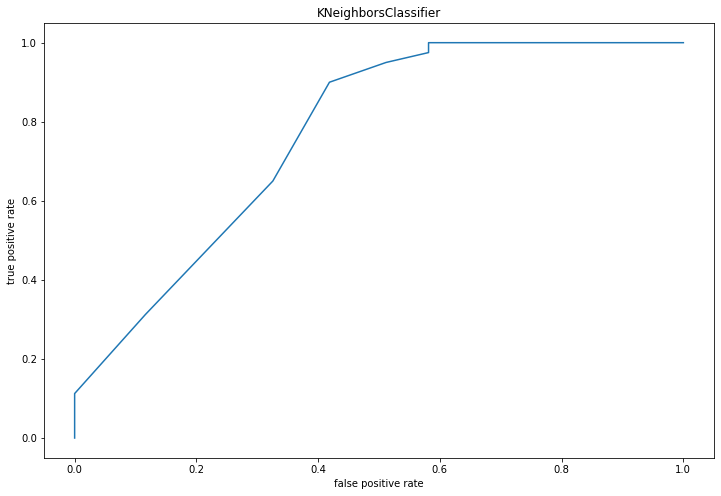

In [255]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("KNeighborsClassifier")
plt.show()

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=63,test_size=0.20)

# From the analysis it is clear that KNeighborsClassifier & Logistic Regression are  the best classifier at random state 63 with a accuracy score of 87
# saving a file
import pickle
filename="picklekregr.pkl"
pickle.dump(KNeighborsClassifier,open(filename,"wb"))